In [74]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_30/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


<Figure size 432x288 with 0 Axes>

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>

# LAB: Evaluación de Modelos

## 1. Introducción

El objetivo de este LAB es realizar la evaluación de un modelos de clasificación partiendo "desde cero". Para ello, usaremos datos de transacciones inmobiliaras en Sacramento.



Importemos los paquetes requeridos:

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

plt.style.use('seaborn-white')
%matplotlib inline

Carguemos el dataset de Sacramento:

In [76]:
sac = pd.read_csv('../Data/Sacramentorealestatetransactions.csv')
sac.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


Primero hagan un checkeo de la "sanidad" de los datos (por ejemplo, pueden evaluar si hay variables con datos nulos)

In [77]:
sac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [78]:
sac.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

Crear una variable binaria en la cual:

+ $Y = 1$ indica que la casa fue vendida por encima de 200.000 dólares
+ $Y = 0$ indica que la casa fue vendida por igual o menos de 200.000 dólares

Quedarse con las siguientes variables: `number of beds`, `baths`, `sq_ft` y el indicador de precio que generamos en el paso anterior

In [79]:
sac['target']=(sac.price>200000).astype(int)

df = sac[['beds','baths','sq__ft','target']]
df.head()

,beds,baths,sq__ft,target
0,2,1,836,0
1,3,1,1167,0
2,2,1,796,0
3,2,1,852,0
4,2,1,797,0


In [80]:
df.target.value_counts(normalize=True)

1    0.546193
0    0.453807
Name: target, dtype: float64

Dividan el dataset entre training y test sets. Los predictores son `beds`, `baths` y `sq ft`. El target es la variable de precio.
El tamaño del test set debe ser 33% y (opcionalmente) pueden intentar estratificar por el target.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X= df.drop('target', axis=1)
y=df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 ,stratify=y, random_state=12)

esc = StandardScaler()

X_train_std=esc.fit_transform(X_train)
X_test_std = esc.transform(X_test)

Fitear un modelo de regresión logística:

In [91]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1e10)

lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)

Imprimir la matriz de confusión:

In [92]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[ 60,  88],
       [ 50, 128]])

Calcular la proporción de casos correctamente clasificados, la precisión y el recall.

In [93]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.5766871165644172

In [94]:
from sklearn.metrics import precision_score

precision_score(y_test,y_pred)
# Que tan bien clasifico mi modelo los casos POSITIVOS, respecto a los valores verdaderos

0.5925925925925926

In [95]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)
# Me dice que tan sencible es mi modelo a detectar los VERDADEROS POSITIVOS sobre el TOTAL de casos Verdaderamente positivos.

0.7191011235955056

¿Qué dicen estas tres medidas acerca del modelo?

Supongamos que un vendedor inmboliario quiere priorizar minimizar los falsos positivos (predecir que una casa se va a vender por encima de \$200.000 cuando en realidad se vende por menos) porque este tipo de errores le hacen "perder plata".

Cambiar el umbral de decisión para **bajar la tasa de falsos positivos** e imprimir nuevamente la matriz de confusión.

In [96]:
lr_proba=lr.predict_proba(X_test_std)

In [106]:
from sklearn.preprocessing import binarize

predict_2=binarize(lr_proba, threshold=0.7)[:,1]

In [107]:
confusion_matrix(y_test, predict_2)

array([[147,   1],
       [131,  47]])

* ¿Cuál sería el lado "negativo" de bajar la tasa de falsos positivos?

Que al bajar los Falsos Positivos, tambien me aumentan los Falsos Negativos

Graficar la curva ROC usando las funciones provistas más arriba.

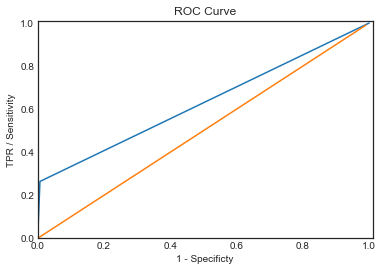

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

fpr,tpr,th=roc_curve(y_test,predict_2)
df_p = pd.DataFrame({'FPR':fpr,
                    'TPR':tpr,
                     'TH':th})
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_p['FPR'], df_p['TPR'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

In [108]:
from sklearn.metrics import auc
auc(fpr,tpr)

0.6286440935317339

**Bonus:** ¿Cuándo pueden ser las métricas precision y recall más útiles que la curva ROC?

Tienden a ser más útiles cuando la proporción de casos positivos es menor, dado que ambas métricas son sensibles a esto.


## BONUS: Evaluar otros modelos

Evaluar otros clasificadores además de una regresión logística para este dataset.